In [80]:
import os
import glob
import re
import seaborn as sns
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()
#bd.to_pickle('~/Documents/GitHub/Defunción/data/bd.pkl', sep=',', index=False, header=True)
bd = df.copy()

In [3]:
#Sample data
bd = bd.sample(frac=0.1)

In [4]:
RE_SUSPICIOUS = re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """returns the share of suspicious characters in a text""" 
    if text == None or len(text) < min_len:
        return 0 
    else:
        return len(RE_SUSPICIOUS.findall(text))/len(text)


In [5]:
from nltk.tokenize import word_tokenize
bd['length'] = bd['nombre'].str.len()
bd['tokens'] = bd['nombre'].apply(word_tokenize)
#length of names
bd['tokens_len'] = bd['tokens'].str.len()
#bd['tokens_len'] = [len(elt.split()) for elt in bd['nombre']]
bd['tokens_len'] = bd['tokens_len'].astype('int8')
#Sexo
bd['sexo'] = bd.sexo.replace((0,9),np.nan)
#edad
bd['edad'] = bd.edad.replace((888,999),np.nan)
bd['edad_est'] = round(((bd['fec_def'] - bd['fec_nac']))/ np.timedelta64(1, 'Y'),0)

# add new column to data frame
bd['impurity'] = bd['nom_c'].apply(impurity, min_len=5)
# get the top 3 records
#bd[['nom_c', 'impurity']].sort_values(by='impurity', ascending=False).head(3)

In [6]:
#bd.describe(include='O').T
bd.describe().T

,count,mean,std,min,25%,50%,75%,max
sexo,892143.0,1.438176e+00,4.961634e-01,1.0,1.0,1.0,2.0,2.0
edad_c,893368.0,4.939229e+00,4.186970e-01,0.0,5.0,5.0,5.0,9.0
edad,891295.0,6.366353e+01,2.270706e+01,0.0,51.0,68.0,81.0,122.0
res_ent,893368.0,1.701241e+01,9.848943e+00,0.0,10.0,15.0,23.0,99.0
res_mun,893368.0,1.707054e+04,9.900574e+03,0.0,10008.0,15081.0,23005.0,99999.0
res_loc,893368.0,1.707056e+08,9.900611e+07,0.0,100080001.0,150810001.0,230050001.0,999999999.0
afiliacion,893368.0,9.773746e+00,2.475273e+01,0.0,1.0,2.0,7.0,99.0
edo_civil,893368.0,3.605546e+00,2.166022e+00,0.0,2.0,4.0,5.0,9.0
escolar,893368.0,3.827215e+01,2.748040e+01,0.0,31.0,32.0,51.0,122.0
def_ent,893368.0,1.651072e+01,8.269044e+00,0.0,9.0,15.0,22.0,99.0


In [7]:
bd.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893368 entries, 580655 to 316296
Data columns (total 26 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   nom_c       893368 non-null  object        
 1   sexo        892143 non-null  float64       
 2   edad_c      893368 non-null  uint32        
 3   edad        891295 non-null  float64       
 4   res_ent     893368 non-null  uint32        
 5   res_mun     893368 non-null  uint32        
 6   res_loc     893368 non-null  uint32        
 7   curp        743139 non-null  category      
 8   afiliacion  893368 non-null  uint32        
 9   edo_civil   893368 non-null  uint32        
 10  escolar     893368 non-null  uint32        
 11  ocupacion   882270 non-null  category      
 12  def_ent     893368 non-null  uint32        
 13  def_mun     893368 non-null  uint32        
 14  def_loc     893368 non-null  category      
 15  causa_bas   892000 non-null  category      
 1

In [ ]:
bd[bd['nombre'].str.contains('juan')]['nombre'].value_counts()

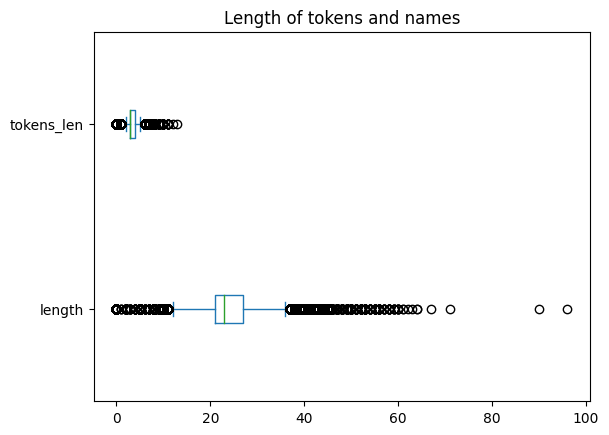

In [9]:
bd[['length','tokens_len']].plot(kind='box', vert = False)
plt.title('Length of tokens and names')
filename = 'box_length.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

<AxesSubplot: ylabel='Frequency'>

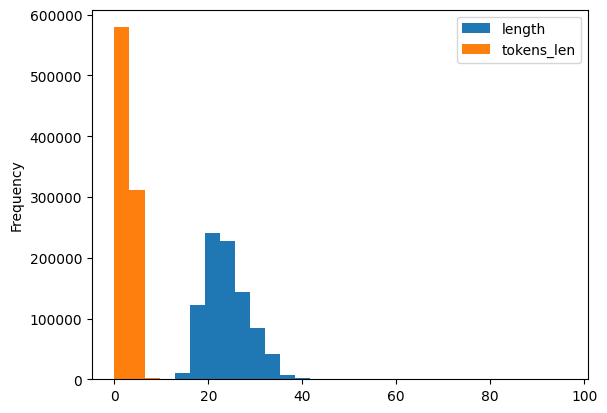

In [10]:
bd[['length','tokens_len']].plot(kind='hist', bins=30)

In [ ]:
from nltk import word_tokenize, pos_tag, ne_chunk
#bd['nombre'] = bd['nombre'].astype('object')

tokens = word_tokenize(str(bd['nombre']))
pos_tags = pos_tag(tokens)
named_entities = ne_chunk(pos_tags)
print(named_entities)

In [12]:
pd.crosstab(bd.tokens_len,bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
tokens_len,,,,,,,,,,,,,
0,2426,2633,2640,218,32,203,233,266,151,214,264,259,82
1,17,44,13,10,10,5,8,8,449,474,415,217,57
2,48,88,58,34,76,28,29,51,271,303,284,193,58
3,35713,35589,36372,39678,40241,41399,42896,43075,43099,46024,67099,70056,25052
4,14110,14565,15506,16687,17401,18076,19116,19890,20335,22094,31626,33607,12370
5,2612,2553,2837,2977,3144,3184,3369,3460,3370,3564,5304,5541,2098
6,800,819,830,873,877,943,920,983,943,979,1459,1559,558
7,116,113,140,130,140,141,149,125,137,127,178,211,73
8,25,27,36,30,37,25,19,28,27,20,42,40,13


In [13]:
#bd.groupby('base').res_ent.value_counts()
pd.crosstab(bd.res_ent, bd.base)

base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
res_ent,,,,,,,,,,,,,
0,0,0,0,153,198,129,180,188,133,96,63,63,30
1,555,494,556,516,542,572,596,656,680,689,968,960,400
2,1532,1475,1497,1485,1546,1564,1746,1809,1857,2090,3247,2851,1134
3,243,248,251,295,315,338,350,377,356,355,468,594,223
4,373,330,376,388,440,467,529,453,505,508,765,803,263
5,1051,1208,1318,1397,1639,1611,1623,1608,1730,1937,2796,2414,1176
6,299,314,396,346,374,432,411,488,458,489,612,696,306
7,1834,1855,2079,2138,2394,2519,2536,2626,2690,2672,3749,3978,1618
8,2166,2246,2005,2098,2126,2085,2226,2333,2371,2483,3755,3133,1370


In [14]:
bd.loc[ [bd.edad.idxmin(),df.edad.idxmax()],
    ['sexo','edad','edad_c','fec_nac', 'fec_def']
    ]

,sexo,edad,edad_c,fec_nac,fec_def
925,1.0,0.0,2,2012-05-29,2012-05-29
1389,2.0,1.0,2,2017-05-29,2017-05-29
1389,1.0,NaN,0,NaT,2018-12-31
1389,2.0,44.0,1,2020-06-15,2020-06-15


<AxesSubplot: title={'center': 'Number of deaths per year'}, xlabel='base'>

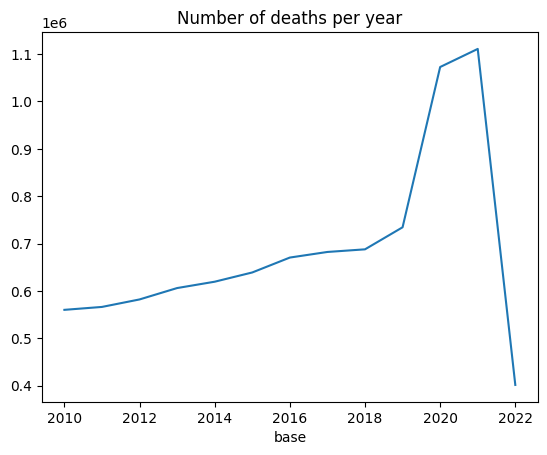

In [15]:
df.groupby('base').size().plot(title="Number of deaths per year")

#df.groupby('base').agg({'sexo': 'sum'}) \
# .plot(title="Avg. Speech Length", ylim=(0,30000))

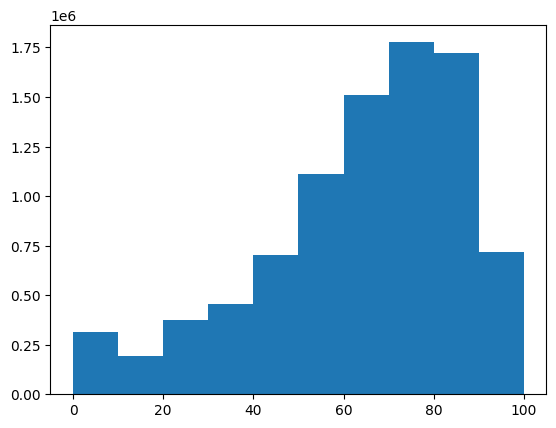

In [16]:
plt.hist(df['edad'], range=(0,100), bins=10)
filename = 'edad.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_3491/3024593917.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


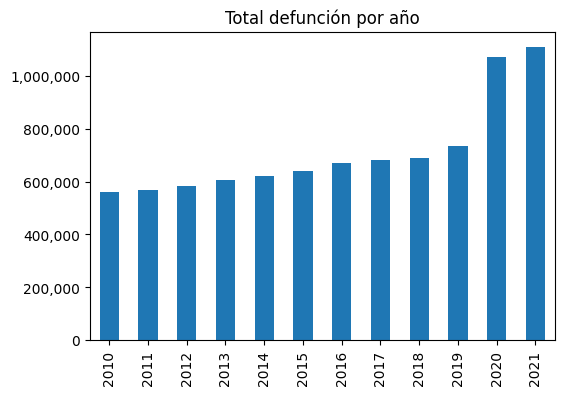

In [17]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar', figsize=(6,4))
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
#plt.show();

In [ ]:
bd[['nombre','nom_c','sexo','edad','fec_nac','curp','res_ent','res_mun','res_loc','base']].sort_values(['fec_nac'])

In [19]:
curp_extract = re.compile(r'\d{6}')
#\d{6}
def extract(text, min_length=10):
    if text==None or len(text) < min_length:
        return None
    else:
        return ''.join(curp_extract.findall(text))

bd['curp_fecnac'] = bd['curp'].apply(extract, min_length=10)
bd.loc[bd['curp_fecnac'] >='888888'] = np.nan

In [20]:
bd.loc[bd['curp_fecnac'] >='888888']

,nom_c,sexo,edad_c,edad,res_ent,res_mun,res_loc,curp,afiliacion,edo_civil,escolar,ocupacion,def_ent,def_mun,def_loc,causa_bas,base,fec_nac,fec_def,miscol,nombre,length,tokens,tokens_len,edad_est,impurity,curp_fecnac


In [21]:
bd[['edad','fec_nac','curp','curp_fecnac','base']][bd['curp_fecnac'].notnull() & bd['fec_nac'].isna()]

,edad,fec_nac,curp,curp_fecnac,base
69880,30.0,NaT,NO ESPECIFICADO,,2016.0
181722,55.0,NaT,NO ESPECIFICADO,,2015.0
69479,30.0,NaT,NO ESPECIFICADO,,2014.0
83446,35.0,NaT,NO ESPECIFICADO,,2014.0
610924,98.0,NaT,NO ESPECIFICADO,,2014.0
...,...,...,...,...,...
681575,NaN,NaT,NO ESPECIFICADO,,2017.0
225625,60.0,NaT,NO ESPECIFICADO,,2015.0
107558,40.0,NaT,NO ESPECIFICADO,,2017.0
637850,NaN,NaT,NO ESPECIFICADO,,2015.0


In [22]:
pd.crosstab(bd.edad,bd.base)

base,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0,2021.0,2022.0
edad,,,,,,,,,,,,,
0.0,29,29,41,0,0,0,0,0,1,0,0,0,0
1.0,828,820,770,773,684,635,619,642,144,197,167,174,104
2.0,580,581,529,543,501,523,479,446,124,120,105,124,69
3.0,390,398,339,342,362,331,338,315,78,95,88,105,45
4.0,264,283,274,288,304,242,255,279,63,75,53,81,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.0,0,0,0,0,0,0,0,0,0,0,0,5,0
119.0,0,0,0,0,0,0,0,0,0,0,3,7,0
120.0,4,0,1,0,0,0,0,0,0,0,1,5,2


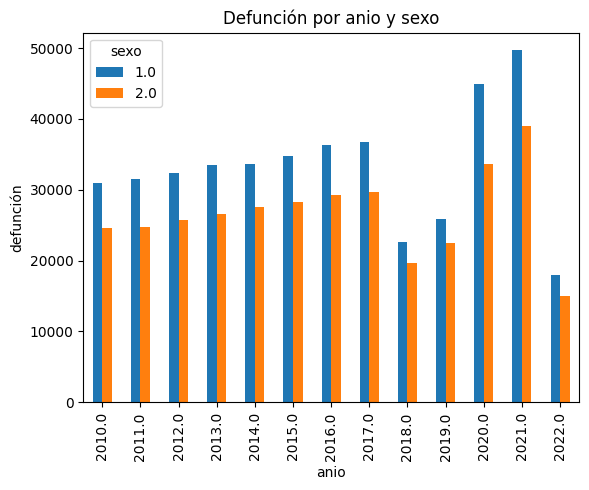

In [23]:
pd.crosstab(bd.base,bd.sexo).plot(kind='bar')
plt.title('Defunción por anio y sexo')
plt.xlabel('anio')
plt.ylabel('defunción')

filename = 'sexo.png'
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)

In [24]:
bins = [0,4,9,14,19,24,29,34,39,44,49,
        54,59,64,69,74,79,84,89,94,120]
labels = ['0-4','5-9','10-14','15-19',
        '20-24','25-29','30-34','35-39',
        '40-44','45-49','50-54','54-59',
        '60-64','65-69','70-74','75-79',
        '80-84','85-89','90-94', '95+']
bd['agerange'] = pd.cut(bd.edad, bins, labels = labels,include_lowest = True)


In [84]:
pyramid = pd.crosstab(bd.agerange,bd.sexo).reset_index()
pyramid = pyramid.rename(columns={1:'Masculino',2:'Femenino','agerange':'age'})
#pyramid = pyramid.set_index('agerange')
pyramid['Masculino'] = pyramid['Masculino']/(-1000)
pyramid['Femenino'] = pyramid['Femenino']/(1000)
ages = pyramid.reset_index()['age'].sort_values(ascending=False).to_list()

In [90]:
pyramid

sexo,age,Masculino,Femenino
0,0-4,-9.505,7.513
1,5-9,-4.548,3.661
2,10-14,-3.198,2.523
3,15-19,-6.173,2.770
4,20-24,-6.991,2.322
5,25-29,-7.827,2.481
6,30-34,-11.882,4.130
7,35-39,-15.276,6.387
8,40-44,-18.154,8.774
9,45-49,-22.449,12.735


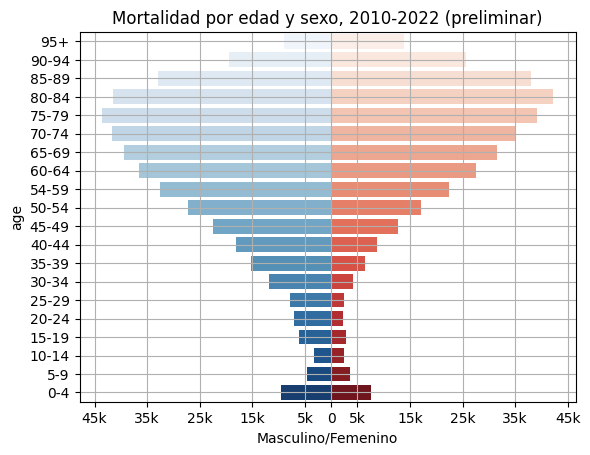

In [96]:
ax1 = sns.barplot(x='Masculino', y='age', data=pyramid, order=ages, palette="Blues")
ax2 = sns.barplot(x='Femenino', y='age', data=pyramid, order=ages, palette="Reds")

plt.title("Mortalidad por edad y sexo, 2010-2022 (preliminar)")
plt.xlabel("Masculino/Femenino")
plt.grid()
plt.xticks(ticks=[-45,-35,-25,-15,-5,0,5,15,25,35,45],
labels=['45k','35k','25k','15k','5k',0,'5k','15k','25k','35k','45k'])

filename = 'mort_age.png'
filename = join(params['path']+params['path graphics'],filename)
plt.savefig(filename)